<font color = "#CC3D3D"><p>
# (DW Practice #2) RFM Analysis

RFM 분석은 Recency(최근성), Frequency(구매빈도), Monetary(구매금액) 이 세가지 기준을 바탕으로 고객을 분류하는 방법론 (*아래 그림은 KTH 사례*)
 - Recency(R): 고객이 얼마나 최근에 구입했는가? 
 - Frequency(F): 고객이 얼마나 빈번하게 구매했는가? 
 - Monetary(M): 고객이 구입한 총 금액은 얼마인가? 
<img align='left' src='http://drive.google.com/uc?export=view&id=1squaxOpxIS1bRJdM3QbzPXZ2dUS9DbYi' style='width: 80%; height: auto;'>

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

#pd.set_option('max_columns', 15, 'max_rows', 20)
sns.set_style('whitegrid')

### Data Collection

#### Read Data

In [2]:
cs = pd.read_csv('L사_고객정보.csv')
cs.head()

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


In [3]:
gd = pd.read_csv('L사_상품정보.csv')
gd.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [4]:
tr = pd.read_csv('L사_거래정보.csv')
tr.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


#### Merge Data

In [5]:
gd.pd_c = gd.pd_c.astype(str).str.zfill(4) # 상품과 거래 데이터의 pd_c 컬럼의 데이터 유형이 서로 달라 맞춰줌 (변경: 4자릿수 맞춤 반영)
df = pd.merge(tr, cs).merge(gd, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64') # 날짜정보를 담고 있는 de_dt 컬럼의 데이터 유형이 정수이기 때문
df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups


### RFM Calculation

#### Recency value

In [6]:
# 최종 구매일 다음날을 기준으로 계산 
now = df.de_dt.max()+pd.DateOffset(days=1)

# method chaining (multi-line)
recency = (df.groupby('clnt_id')['de_dt']
           .agg(lambda x,y: (y - x).min().days, now).reset_index()
           .rename(columns={'de_dt':'recency'})
          )
recency

,clnt_id,recency
0,2,32
1,9,17
2,12,38
3,20,1
4,23,3
...,...,...
11266,72373,15
11267,72400,23
11268,72410,12
11269,72423,14


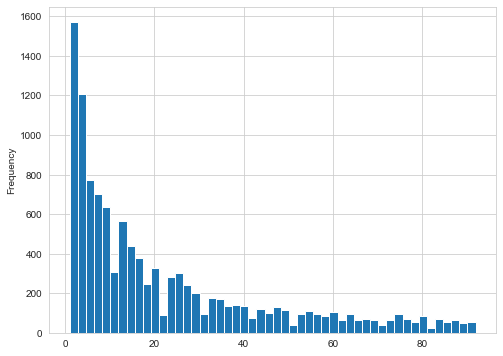

In [7]:
plt.figure(figsize=(8,6))
recency.recency.plot.hist(bins=50)
plt.show()

#### Frequency value

In [8]:
frequency =  df.groupby('clnt_id')['trans_id'].agg([('frequency', Series.nunique)]).reset_index()
frequency

,clnt_id,frequency
0,2,6
1,9,7
2,12,1
3,20,7
4,23,9
...,...,...
11266,72373,9
11267,72400,4
11268,72410,16
11269,72423,2


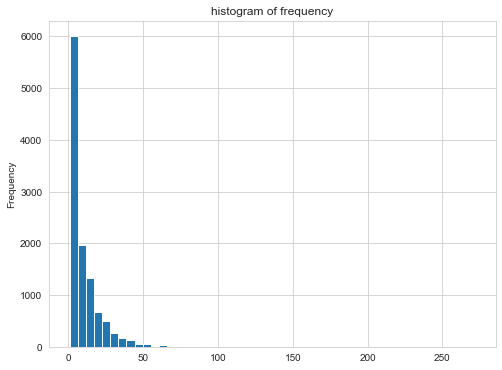

In [9]:
plt.figure(figsize=(8,6))
frequency.frequency.plot.hist(bins=50, title='histogram of frequency')
plt.show()

#### Monetary value

In [10]:
monetary = df.groupby('clnt_id')['buy_am'].agg([('monetary', np.sum)]).reset_index()
monetary

,clnt_id,monetary
0,2,157100
1,9,339941
2,12,29900
3,20,238580
4,23,202964
...,...,...
11266,72373,1038950
11267,72400,302710
11268,72410,463670
11269,72423,499500


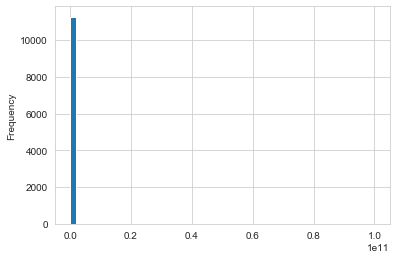

In [11]:
monetary.monetary.plot.hist(bins=50)
plt.show()

In [12]:
# (변경사항) 극단적으로 구매액이 높은 고객이 있음.
monetary.query('clnt_id == 50600')

,clnt_id,monetary
7834,50600,100003219803


In [13]:
# 일반고객이 아닐 가능성이 높기 때문에 분석에서 제거
monetary = monetary.drop(7834)

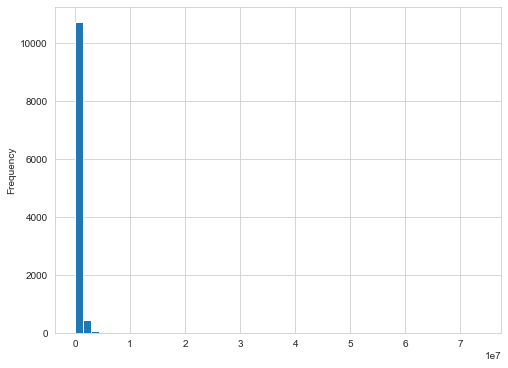

In [14]:
plt.figure(figsize=(8,6))
monetary.monetary.plot.hist(bins=50)
plt.show()

<font color='red'><p>
##### Added Codes

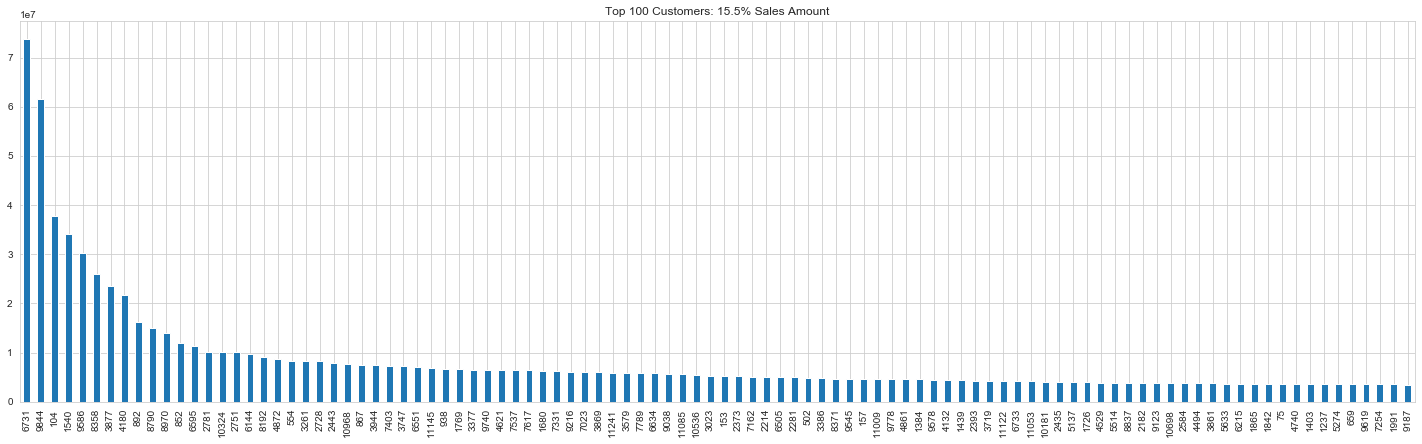

In [15]:
# 구매액 기준 상위 n명의 구매액과 전체 구매액에서 그들이 차이하는 비중을 도식 
plt.figure(figsize=(25, 7))

top_n = 100
percent_sales = (monetary.monetary.sort_values(ascending=False).iloc[:top_n].sum() / monetary.monetary.sum()).round(3)
monetary.monetary.sort_values(ascending=False).iloc[:top_n].plot.bar(title=f'Top {top_n} Customers: {percent_sales:.1%} Sales Amount')
plt.show()

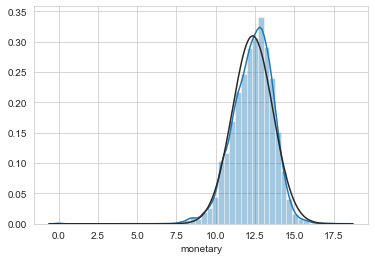

In [16]:
# 왼쪽으로 치우친 값(scale-free)을 로그변환하여 정규분포에 근사하게 변환
from scipy.stats import norm

sns.distplot(monetary.monetary.apply(lambda x: np.log1p(x)), fit=norm)

#### RFM score

In [17]:
# 위에서 만든 3개의 data_frame를 merge
rfm = recency.merge(frequency).merge(monetary)
rfm

,clnt_id,recency,frequency,monetary
0,2,32,6,157100
1,9,17,7,339941
2,12,38,1,29900
3,20,1,7,238580
4,23,3,9,202964
...,...,...,...,...
11265,72373,15,9,1038950
11266,72400,23,4,302710
11267,72410,12,16,463670
11268,72423,14,2,499500


In [18]:
# recency, frequency, monetary 값을 각각 5분위로 분류하여 점수 부여
rfm['R'] = pd.qcut(rfm['recency'], q=5, labels=range(5,0,-1)).astype(int)
rfm['F'] = pd.qcut(rfm['frequency'], q=5, labels=range(1,6)).astype(int)
rfm['M'] = pd.qcut(rfm['monetary'], q=5, labels=range(1,6)).astype(int)
rfm

,clnt_id,recency,frequency,monetary,R,F,M
0,2,32,6,157100,2,3,2
1,9,17,7,339941,3,3,3
2,12,38,1,29900,2,1,1
3,20,1,7,238580,5,3,3
4,23,3,9,202964,5,4,3
...,...,...,...,...,...,...,...
11265,72373,15,9,1038950,3,4,5
11266,72400,23,4,302710,2,2,3
11267,72410,12,16,463670,3,4,4
11268,72423,14,2,499500,3,1,4


In [19]:
# R,F,M 점수를 조합하여 RFM 그룹 생성
rfm['RFMgroup'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,clnt_id,recency,frequency,monetary,R,F,M,RFMgroup
0,2,32,6,157100,2,3,2,232
1,9,17,7,339941,3,3,3,333
2,12,38,1,29900,2,1,1,211
3,20,1,7,238580,5,3,3,533
4,23,3,9,202964,5,4,3,543
...,...,...,...,...,...,...,...,...
11265,72373,15,9,1038950,3,4,5,345
11266,72400,23,4,302710,2,2,3,223
11267,72410,12,16,463670,3,4,4,344
11268,72423,14,2,499500,3,1,4,314


In [20]:
# 실제 조합은 125 보다 적음.
rfm.RFMgroup.nunique()

116

In [21]:
# R,F,M 에 대한 중요도를 고려하여 RFM 점수 부여
weights = [4, 2, 4]
rfm['RFMscore'] = weights[0] * rfm['R'] + weights[1] * rfm['F'] + weights[2] * rfm['M']
rfm

,clnt_id,recency,frequency,monetary,R,F,M,RFMgroup,RFMscore
0,2,32,6,157100,2,3,2,232,22
1,9,17,7,339941,3,3,3,333,30
2,12,38,1,29900,2,1,1,211,14
3,20,1,7,238580,5,3,3,533,38
4,23,3,9,202964,5,4,3,543,40
...,...,...,...,...,...,...,...,...,...
11265,72373,15,9,1038950,3,4,5,345,40
11266,72400,23,4,302710,2,2,3,223,24
11267,72410,12,16,463670,3,4,4,344,36
11268,72423,14,2,499500,3,1,4,314,30


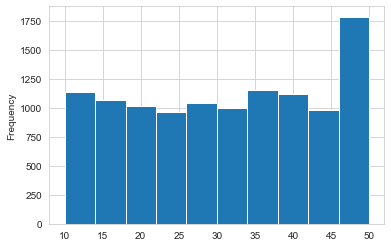

In [22]:
rfm.RFMscore.plot.hist()

### Customer Segmentation

#### Segmentation with Recency and Frequency Grid (*source: clevertap*)

<img align='left' src='https://guillaume-martin.github.io/images/rfm-segments.png'>

In [23]:
# 위 그림에 따라 고객 세분화 
seg_map = { # replace()에서 정규식 사용
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose them',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(seg_map, regex=True)
rfm.head()

,clnt_id,recency,frequency,monetary,R,F,M,RFMgroup,RFMscore,segment
0,2,32,6,157100,2,3,2,232,22,at risk
1,9,17,7,339941,3,3,3,333,30,need attention
2,12,38,1,29900,2,1,1,211,14,hibernating
3,20,1,7,238580,5,3,3,533,38,potential loyalists
4,23,3,9,202964,5,4,3,543,40,champions


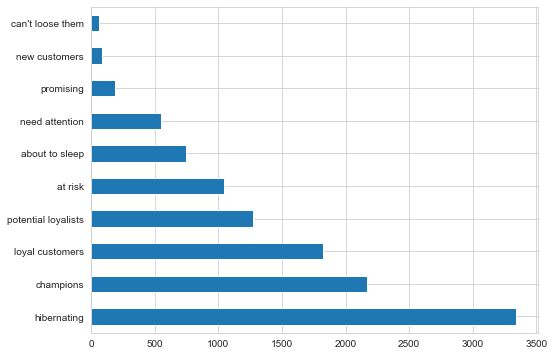

In [24]:
# 세그먼트 별 고객 수
plt.figure(figsize=(8,6))
rfm.segment.value_counts().plot.barh()

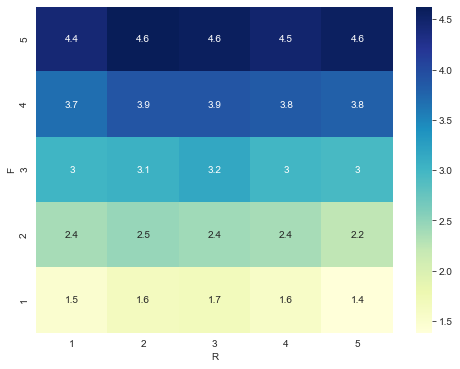

In [25]:
# Recency & Frequency Grid에 Monetary 정보를 추가한 그림
pv = pd.pivot_table(rfm, index='F', columns='R', values='M', aggfunc=np.mean).iloc[::-1,:]
plt.figure(figsize=(8,6))
sns.heatmap(pv, annot=True, cmap="YlGnBu")

#### Further Analysis ...

In [26]:
# 추가분석을 위해 RFM 분석결과를 기존 데이터와 병합
md = pd.merge(df, rfm)
md.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,...,clac_nm3,recency,frequency,monetary,R,F,M,RFMgroup,RFMscore,segment
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,...,Chilled Soups,11,6,79980,3,3,1,331,22,need attention
1,21922,104999,4,A03,0178,2019-09-20,12:41,9900,1,F,...,Chilled Noodles,11,6,79980,3,3,1,331,22,need attention
2,21922,102455,3,A03,1584,2019-09-18,21:07,2990,1,F,...,Onions,11,6,79980,3,3,1,331,22,need attention
3,21922,102455,1,A03,0943,2019-09-18,21:07,11160,1,F,...,Domestic Beefs - Rounds,11,6,79980,3,3,1,331,22,need attention
4,21922,102455,5,A03,1566,2019-09-18,21:07,3890,1,F,...,Cucumbers,11,6,79980,3,3,1,331,22,need attention


In [27]:
# champions 세그먼트의 주요 구매상품 분석
champions = md.query('segment == "champions"').clac_nm2.value_counts().head(5)
champions

Snacks                 15039
Milk                   10019
Domestic Fruits         9724
Tofu / Bean Sprouts     9423
Yogurt                  9118
Name: clac_nm2, dtype: int64

In [28]:
# hibernating 세그먼트의 주요 구매상품 분석
hibernating = md.query('segment == "hibernating"').clac_nm2.value_counts().head(5)
hibernating

Snacks                  1282
Instant Noodles         1005
Frozen Instant Foods     948
Domestic Fruits          846
Milk                     665
Name: clac_nm2, dtype: int64

In [29]:
# 위의 두 세그먼트 비교분석
DataFrame({"champions": champions.index, "hibernating": hibernating.index})

,champions,hibernating
0,Snacks,Snacks
1,Milk,Instant Noodles
2,Domestic Fruits,Frozen Instant Foods
3,Tofu / Bean Sprouts,Domestic Fruits
4,Yogurt,Milk


In [30]:
# 전체 세그먼트 주요 구매상품 비교분석
DataFrame({seg: md.query('segment == @seg').clac_nm2.value_counts().head(5).index for seg in seg_map.values()})

,hibernating,at risk,can't loose them,about to sleep,need attention,loyal customers,promising,new customers,potential loyalists,champions
0,Snacks,Snacks,Snacks,Frozen Instant Foods,Snacks,Snacks,Instant Noodles,Instant Noodles,Snacks,Snacks
1,Instant Noodles,Domestic Fruits,Domestic Fruits,Instant Noodles,Instant Noodles,Milk,Snacks,Snacks,Frozen Instant Foods,Milk
2,Frozen Instant Foods,Frozen Instant Foods,Beer,Snacks,Frozen Instant Foods,Domestic Fruits,Frozen Instant Foods,Frozen Instant Foods,Instant Noodles,Domestic Fruits
3,Domestic Fruits,Instant Noodles,Frozen Instant Foods,Domestic Fruits,Domestic Fruits,Frozen Instant Foods,Milk,Leaf Vegetables,Tofu / Bean Sprouts,Tofu / Bean Sprouts
4,Milk,Milk,Milk,Milk,Yogurt,Tofu / Bean Sprouts,Domestic Fruits,Biscuits,Domestic Fruits,Yogurt


### 또 다른 RFM 분석사례 (*FedEx*)
- 대상고객: 전체 4개의 서비스 상품 중 2개의 상품을 구매한 고객
- 대상실적: 최근 6개월간 서비스 이용실적
- 점수부여방식
  - Recency = 최근 3개월 이내 이용 -> 2점, 3개월 이전 이용 -> 1점
  - Frequency = 최근 6개월간총서비스 이용 횟수
  - Monetary = 최근 6개월 간 총 이용금액
- 점수산출방식
  - R점수 * F점수 * M점수
- 관리방식
  - 전체 고객을 총 10개의 군으로 구분하여 관리

<font color = "#CC3D3D"><p>
# End